In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns

from numpy.random import seed
seed(1) 

import statsmodels.api as sm
from statsmodels import regression,stats
import statsmodels.stats.diagnostic as smd
import scipy

import math

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

from keras.layers import Input, Dense,Conv1D, Conv2D, MaxPooling2D, UpSampling2D,dot,Reshape,add,Lambda
from keras.layers import BatchNormalization,LeakyReLU
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras import backend as K

from tensorflow import set_random_seed 
set_random_seed(2)

Using TensorFlow backend.


## Get r_square data and loss data
## auto_one_r_square is the r_square of the autoencoders who has one dense in beta side network, but four or five or six or seven or eight factors in the bottleneck layer.

In [2]:
auto_one_r_square=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\auto_one_four_r_square.csv')
auto_one_r_square.rename(columns = {'Unnamed: 0':'portfolio'},inplace=True)
auto_one_r_square.set_index('portfolio',drop=True,inplace=True)

auto_one_loss=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\auto_one_four_loss.csv')
auto_one_loss.drop(columns='Unnamed: 0',inplace=True)

auto_one_mse=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\auto_one_four_mse.csv')
auto_one_mse.drop(columns='Unnamed: 0',inplace=True)

In [3]:
auto_one_loss.tail()

,history_1_4_loss,history_1_5_loss,history_1_6_loss,history_1_7_loss,history_1_8_loss
995,0.000009,0.000007,0.000006,0.000006,0.000004
996,0.000009,0.000007,0.000006,0.000006,0.000004
997,0.000009,0.000007,0.000006,0.000006,0.000004
998,0.000009,0.000007,0.000006,0.000006,0.000004
999,0.000009,0.000007,0.000006,0.000005,0.000004


In [4]:
auto_two_r_square=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\auto_two_four_r_square.csv')
auto_two_r_square.rename(columns = {'Unnamed: 0':'portfolio'},inplace=True)
auto_two_r_square.set_index('portfolio',drop=True,inplace=True)

auto_two_loss=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\auto_two_four_loss.csv')
auto_two_loss.drop(columns='Unnamed: 0',inplace=True)

auto_two_mse=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\auto_two_four_mse.csv')
auto_two_mse.drop(columns='Unnamed: 0',inplace=True)

In [5]:
auto_three_r_square=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\auto_three_four_r_square.csv')
auto_three_r_square.rename(columns = {'Unnamed: 0':'portfolio'},inplace=True)
auto_three_r_square.set_index('portfolio',drop=True,inplace=True)

auto_three_loss=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\auto_three_four_loss.csv')
auto_three_loss.drop(columns='Unnamed: 0',inplace=True)

auto_three_mse=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\auto_three_four_mse.csv')
auto_three_mse.drop(columns='Unnamed: 0',inplace=True)

## Below is linear regression results by four Famm and French factors

In [6]:
F_F_r_square=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\F_F_r_square.csv')
F_F_r_square.rename(columns = {'Unnamed: 0':'portfolio'},inplace=True)
F_F_r_square.set_index('portfolio',drop=True,inplace=True)

## Below is Principal component analysis results by four Famm and French factors

In [44]:
PCA_r_square=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\PCA_r_square.csv')
PCA_r_square.rename(columns = {'Unnamed: 0':'portfolio'},inplace=True)
PCA_r_square.set_index('portfolio',drop=True,inplace=True)

PCA_r_square_stand=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\PCA_r_square_stand.csv')
PCA_r_square_stand.rename(columns = {'Unnamed: 0':'portfolio'},inplace=True)
PCA_r_square_stand.set_index('portfolio',drop=True,inplace=True)

pct_per_one=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\pct_per_one.csv')
pct_per_one.rename(columns = {'Unnamed: 0':'date'},inplace=True)
pct_per_one.set_index('date',drop=True,inplace=True)

pct_per_two=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\pct_per_two.csv')
pct_per_two.rename(columns = {'Unnamed: 0':'date'},inplace=True)
pct_per_two.set_index('date',drop=True,inplace=True)

pct_per_three=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\pct_per_three.csv')
pct_per_three.rename(columns = {'Unnamed: 0':'date'},inplace=True)
pct_per_three.set_index('date',drop=True,inplace=True)

pct_per_four=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\pct_per_four.csv')
pct_per_four.rename(columns = {'Unnamed: 0':'date'},inplace=True)
pct_per_four.set_index('date',drop=True,inplace=True)

pct_per_five=pd.read_csv(r'F:\capstone\xz\0711\0724\autoencoder\outcome\pct_per_five.csv')
pct_per_five.rename(columns = {'Unnamed: 0':'date'},inplace=True)
pct_per_five.set_index('date',drop=True,inplace=True)

## Below is the volatility percentage that can be explained by PCA

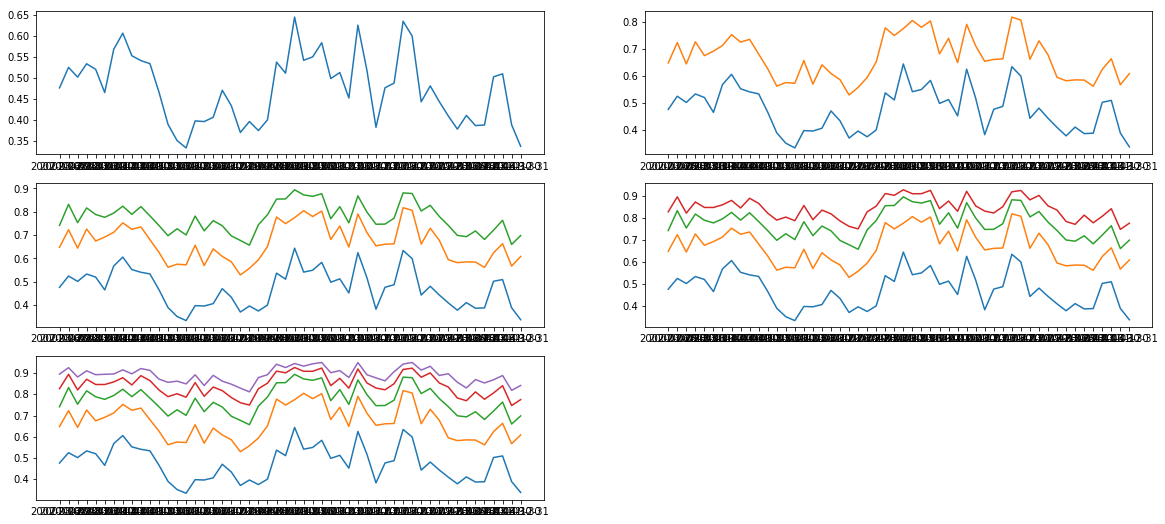

In [8]:
plt.figure(figsize=(20,9))
plt.subplot(3, 2, 1)
plt.plot(pd.DataFrame(pct_per_one))

plt.subplot(3, 2, 2)
plt.plot(pd.DataFrame(pct_per_two))

plt.subplot(3, 2, 3)
plt.plot(pd.DataFrame(pct_per_three))
         
plt.subplot(3, 2, 4)
plt.plot(pd.DataFrame(pct_per_four))
         
plt.subplot(3, 2, 5)
plt.plot(pd.DataFrame(pct_per_five))
         

plt.show()

## Below is the loss by autoencoder and the mse calculated by hand. We can see that they are very close, showing that the target of autoencoder model is just what we want

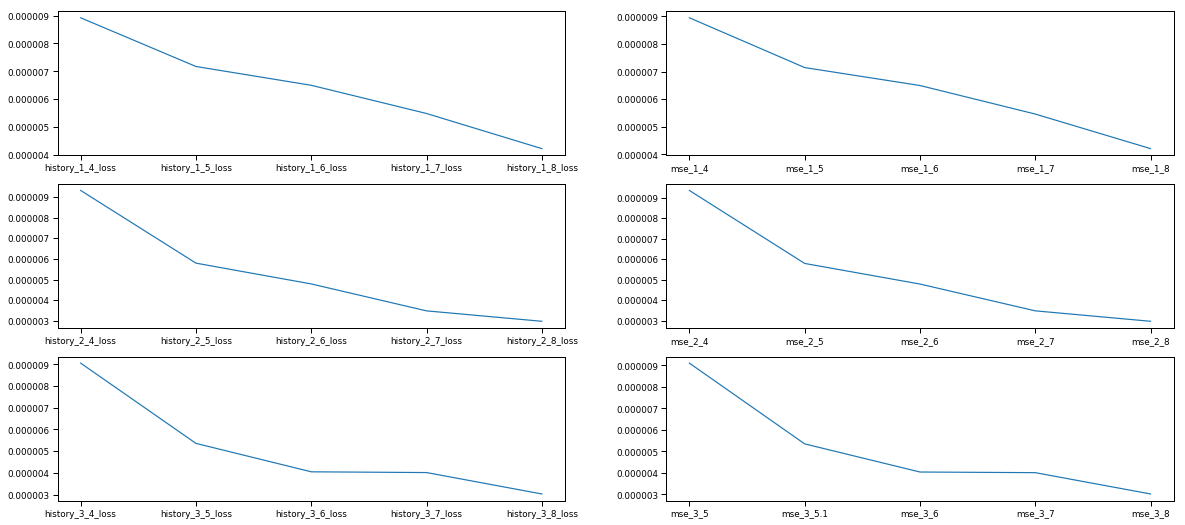

In [40]:
plt.figure(figsize=(20,9))
plt.subplot(3, 2, 1)
plt.plot(auto_one_loss.iloc[-1])

plt.subplot(3, 2, 2)
plt.plot(auto_one_mse.iloc[-1])

plt.subplot(3, 2, 3)
plt.plot(auto_two_loss.iloc[-1])

plt.subplot(3, 2, 4)
plt.plot(auto_two_mse.iloc[-1])

plt.subplot(3, 2, 5)
plt.plot(auto_three_loss.iloc[-1])

plt.subplot(3, 2, 6)
plt.plot(auto_three_mse.iloc[-1])

plt.show()

# plot the r squre of different models
## For example, 1-4 means one dense in beta side network and four factor in bottleneck layer.

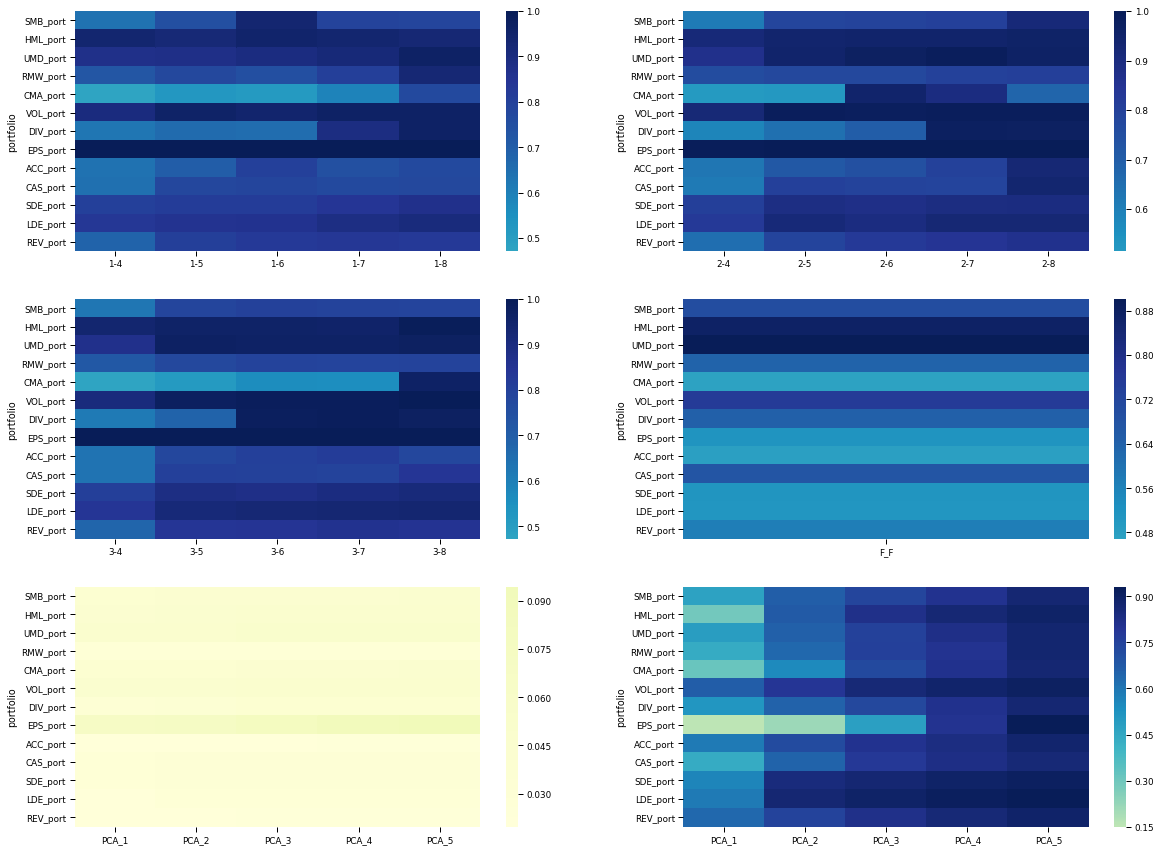

In [46]:
plt.figure(figsize=(20,15))
sns.set_context("paper")
plt.subplot(3, 2, 1)
sns.heatmap(auto_one_r_square,cmap="YlGnBu",xticklabels=['1-4','1-5','1-6','1-7','1-8'],center=0.4)

plt.subplot(3, 2, 2)
sns.heatmap(auto_two_r_square,cmap="YlGnBu",xticklabels=['2-4','2-5','2-6','2-7','2-8'],center=0.4)

plt.subplot(3, 2, 3)
sns.heatmap(auto_three_r_square,cmap="YlGnBu",xticklabels=['3-4','3-5','3-6','3-7','3-8'],center=0.4)

plt.subplot(3, 2, 4)
sns.heatmap(F_F_r_square,cmap="YlGnBu",xticklabels=['F_F'],center=0.4)

plt.subplot(3, 2, 5)
sns.heatmap(PCA_r_square,cmap="YlGnBu",xticklabels=['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5'],center=0.4)

plt.subplot(3, 2, 6)
sns.heatmap(PCA_r_square_stand,cmap="YlGnBu",xticklabels=['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5'],center=0.4)

plt.show()

In [12]:
name=['SMB', 'HML', 'UMD', 'RMW', 'CMA', 'VOL','DIV', 'EPS', 'ACC', 'CAS', 'SDE', 'LDE','REV']

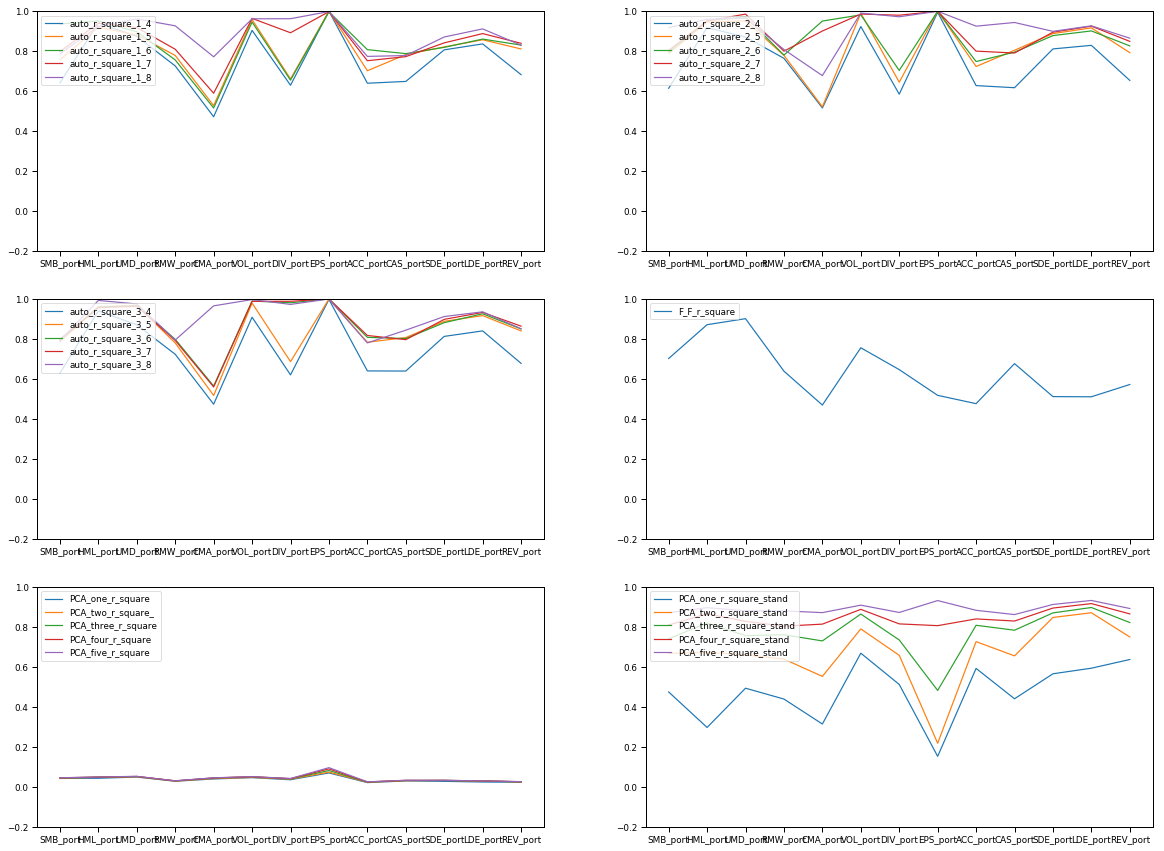

In [47]:
plt.figure(figsize=(20,15))
plt.subplot(3, 2, 1)
plt.plot(auto_one_r_square)
plt.legend(auto_one_r_square.columns,loc=2)
plt.ylim((-0.2,1))

plt.subplot(3, 2, 2)
plt.plot(auto_two_r_square)
plt.legend(auto_two_r_square.columns,loc=2)
plt.ylim((-0.2,1))

plt.subplot(3, 2, 3)
plt.plot(auto_three_r_square)
plt.legend(auto_three_r_square.columns,loc=2)
plt.ylim((-0.2,1))

plt.subplot(3, 2, 4)
plt.plot(F_F_r_square)
plt.legend(F_F_r_square.columns,loc=2)
plt.ylim((-0.2,1))

plt.subplot(3, 2, 5)
plt.plot(PCA_r_square)
plt.legend(PCA_r_square.columns,loc=2)
plt.ylim((-0.2,1))

plt.subplot(3, 2, 6)
plt.plot(PCA_r_square_stand)
plt.legend(PCA_r_square_stand.columns,loc=2)
plt.ylim((-0.2,1))

plt.show()

## According to the plot above, auto_one_four, auto_two_four, auto_three_four perform the best.

In [53]:
pred_best=pd.concat((auto_one_r_square.iloc[:,4],auto_two_r_square.iloc[:,4],auto_three_r_square.iloc[:,4],
                     F_F_r_square,PCA_r_square.loc[:,'PCA_five_r_square'],
                     PCA_r_square_stand.loc[:,'PCA_five_r_square_stand']),axis=1)

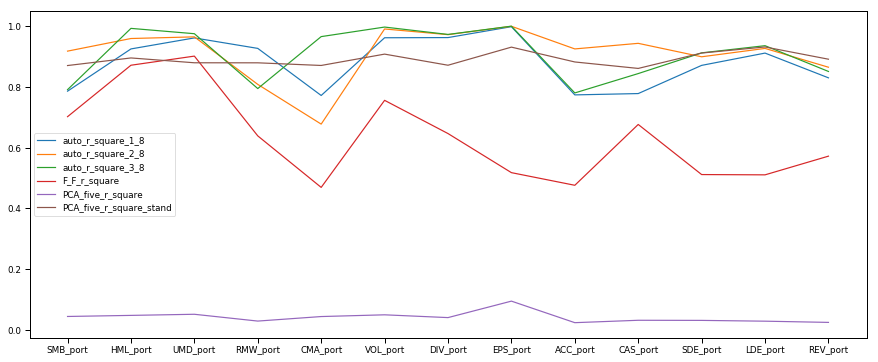

In [54]:
plt.figure(figsize=(15,6))
plt.plot(pred_best)
plt.legend(['auto_r_square_1_8','auto_r_square_2_8','auto_r_square_3_8','F_F_r_square','PCA_five_r_square',
           'PCA_five_r_square_stand'])
plt.show()

## According to the plot above, we can see that autoencoder has done a good job of predicting returns.